In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [3]:
(xtrain, ytrain), (xtest,ytest)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
xtrain[0]

In [9]:
xtrain.shape

(60000, 28, 28)

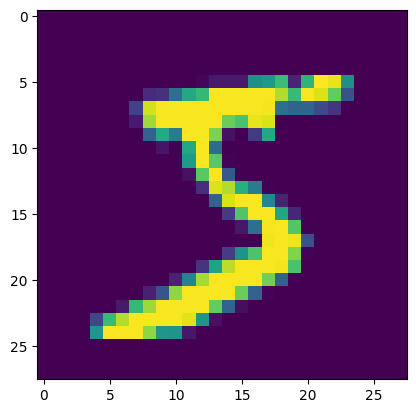

In [11]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[0])

In [13]:
xtrain=xtrain/255
xtest=xtest/255

In [ ]:
xtrain[0]

In [27]:
model= Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

In [34]:
history= model.fit(xtrain, ytrain, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0180 - val_loss: 0.1138
Epoch 2/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0150 - val_loss: 0.1249
Epoch 3/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0134 - val_loss: 0.1598
Epoch 4/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0151 - val_loss: 0.1319
Epoch 5/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0110 - val_loss: 0.1369
Epoch 6/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0086 - val_loss: 0.1415
Epoch 7/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0146 - val_loss: 0.1406
Epoch 8/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0082 - val_loss: 0.1483
Epoch 9/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0129 - val_loss: 0.1549
Epoch 10/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.006

In [35]:
ypred= model.predict(xtest)

313/313 [==============================] - 1s 4ms/step


In [36]:
ypred= ypred.argmax(axis=1)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.9801

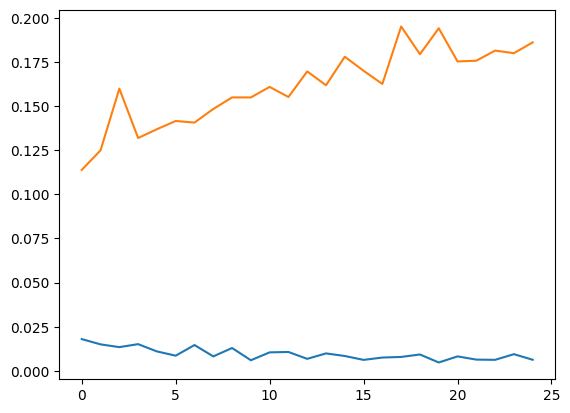

In [39]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [46]:
model.predict(xtest[5].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 32ms/step


array([1])

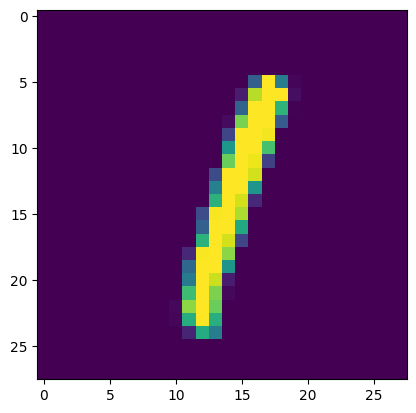

In [45]:
plt.imshow(xtest[5])